In [4]:
from sympy import *
init_printing()

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
m, x, alpha, beta, y, z, m0 = symbols('m x alpha beta y z m0', nonnegative=True)

In [6]:
V = Function("V")

In [7]:
# Something is a little off. What you are integrating is x * m, so you shouldn't have x*m in below, just x.

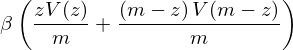

In [112]:
# Here, z represents the actual arrival, not a fraction of m.
query_expression = beta * ((z/m) * V(z) + ((m - z)/m) * V(m - z))
query_expression

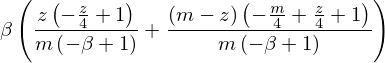

In [113]:
def linear(state):
    return (1 - state / 4) / (1 - beta)

query_expression_w_linear = query_expression.subs(V(z), linear(z)).subs(V(m - z), linear(m - z))
query_expression_w_linear

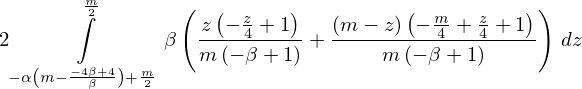

In [114]:
m0 = 4 * (1 - beta) / beta
query_integral = 2 * Integral(query_expression_w_linear, (z, (m / 2) - (alpha * (m - m0)), m/2))
query_integral

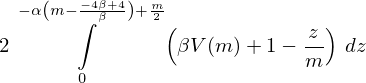

In [115]:
half = Integer(1)/2
guess_unknown_integral = 2 * Integral(half + (half - z/m) + beta * V(m), (z, 0, m/2 - alpha*(m - m0)))
guess_unknown_integral

In [117]:
guess_known_integral = (1 - m) * (1 + beta * V(m))
guess_known_integral

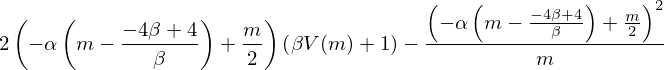

In [118]:
guess_unknown_value = guess_unknown_integral.doit()
guess_unknown_value

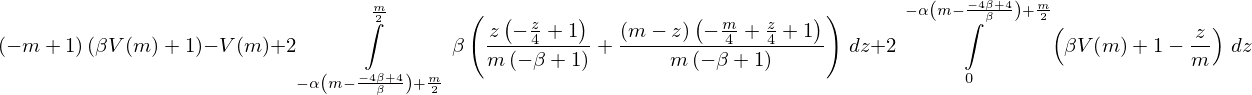

In [119]:
should_be_zero = query_integral + guess_unknown_integral + guess_known_integral - V(m)
should_be_zero

In [149]:
solutionsfoo = solveset(should_be_zero, V(m))

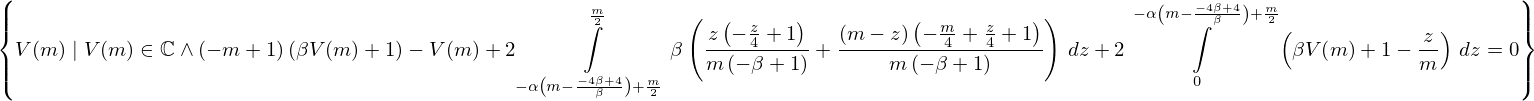

In [150]:
solutionsfoo

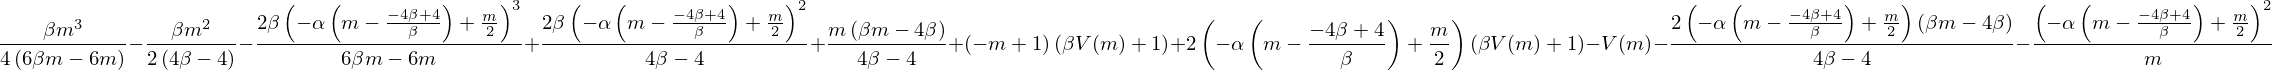

In [120]:
should_be_zero_evald = should_be_zero.doit()
should_be_zero_evald

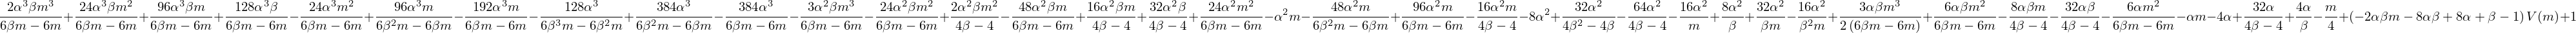

In [121]:
should_be_zero_evald.expand().collect(V(m))

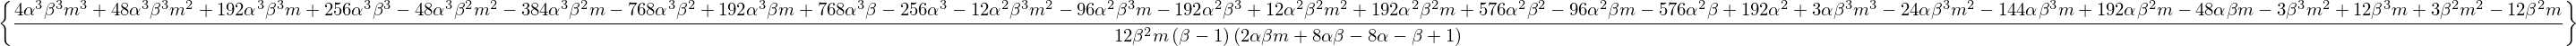

In [122]:
solutions = solveset(should_be_zero_evald, V(m))
solutions

In [123]:
solution = list(solutions)[0]

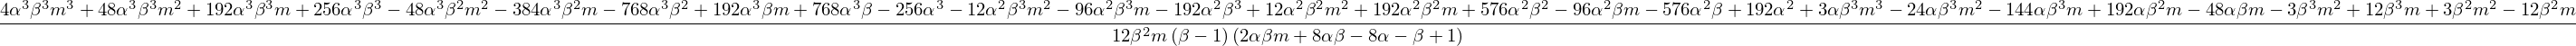

In [124]:
solution

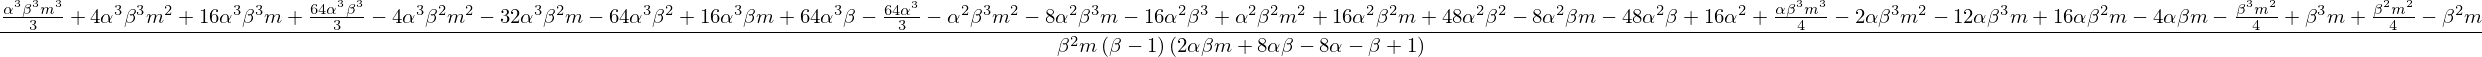

In [125]:
solution.simplify()

In [126]:
# This is what I have to work with, after plugging in alpha = fixed fraction of m - m0

In [127]:
concretized = solution.subs(beta, 0.99).subs(alpha, 0.6)

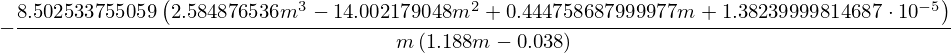

In [128]:
concretized

In [129]:
# What I'd really like to do is express everything in terms of m - m0. Call that delta-m

In [130]:
delta_m = Symbol("\Delta m")

In [131]:
# We know that m = m0 + delta_m.

In [132]:
reparam = solution.subs(m, m0 + delta_m)

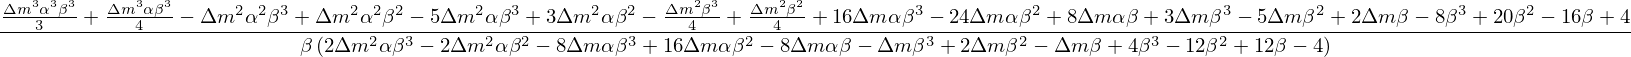

In [133]:
reparam.simplify()

In [134]:
reparam_concretized = reparam.simplify().subs(beta, 0.99).subs(alpha, 0.10)

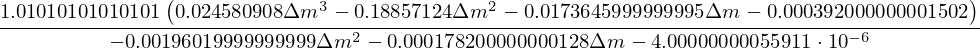

In [135]:
reparam_concretized

In [136]:
# This is hecking weird

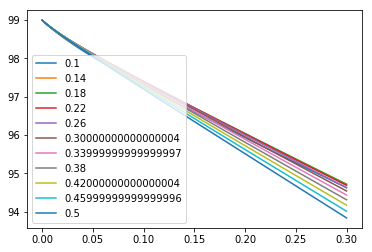

In [137]:
dms = np.linspace(0, 0.3, 100)
alphas = np.linspace(0.1, 0.5, 11)
for alpha_val in alphas:
    f = reparam.subs(beta, 0.99)
    plt.plot(dms, [f.subs(alpha, alpha_val).subs(delta_m, dm) for dm in dms], label=alpha_val)
plt.legend()

In [138]:
# This looks a lot more sensible

In [139]:
m0.subs(beta, 0.99)

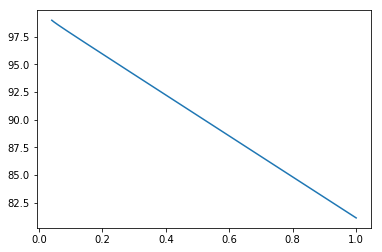

In [140]:
ms = np.linspace(float(m0.subs(beta, 0.99)), 1, 1000)
plt.plot(ms, [concretized.subs(m, mval) for mval in ms])

In [ ]:
# Look, this can't be right at all. 
# Wait a minute, this alpha might not be optimal. 
# Let's try...

In [142]:
# This can't be right. What is this hecking crap???

In [143]:
# This is the value function, not the regret.

In [144]:
reparam_concretized.subs(delta_m, 0)

In [145]:
# Hold up--what the fuck is up with this??? It can't get BIGGER as you increase delta_m...
# THis is some garbage
reparam_concretized.subs(delta_m, 0.008)

In [146]:
reparam_concretized.subs(delta_m, 0.020)

In [147]:
# This is close to simulation.

In [148]:
reparam_concretized.subs(delta_m, 0.1)

In [ ]:
# This is not... Starting to think there is a problem with my simulation. 

In [ ]:
# There's no way this can agree with my logarithmic expression...

In [ ]:
# TODO try iterating the integral with alpha = 0.3 as above and see what we get to.

In [ ]:
def iterate_value_function(previous, alpha_value):
    query_expression_w_previous = query_expression.subs(V(z), previous(z)).subs(V(m - z), previous(m - z))
    query_integral = 2 * Integral(query_expression_w_previous, (z, (m / 2) - (alpha * (m - m0)), m/2))
    guess_unknown_integral = 2 * Integral(half + (half - z/m) + beta * V(m), (z, 0, m/2 - alpha*(m - m0)))
    guess_known_integral = (1 - m) * (1 + beta * V(m))
    should_be_zero = query_integral + guess_unknown_integral + guess_known_integral - V(m)


In [30]:
def linear(state):
    return (1 - state / 4) / (1 - beta)

In [31]:
# This is pretty disgusting. 

In [32]:
diff_soln = diff(solution, alpha)

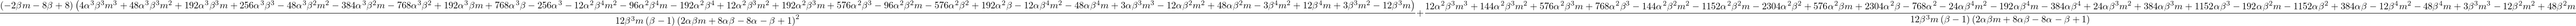

In [33]:
diff_soln

In [ ]:
# I have no idea what to do next. 

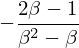

In [36]:
solution.limit(m, m0)

In [38]:
mm = symbols("mm")

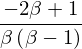

In [40]:
(((1 - mm/4) / (1 - beta)).subs(mm, m0)).simplify()

In [ ]:
# That's a nice sanity check!

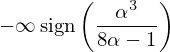

In [43]:
# This doesn't work because m0 goes negative as we send beta to 0.
# In order for this to make sense, we need to substitute m0 = 0 and then do the limit.
solution.subs(m, 1).limit(beta, 0)

In [ ]:
# Whoa, alright. This is clearly wrong. It should be the value function at m_0, which we know to be different
# It makes sense that the alpha should drop out, though, because in the limit, you're only querying in the center.
# Not sure what else I can do here.

In [ ]:
# Maybe try to do the hand calculation in the limit again?
# Or do a super high res simulation?